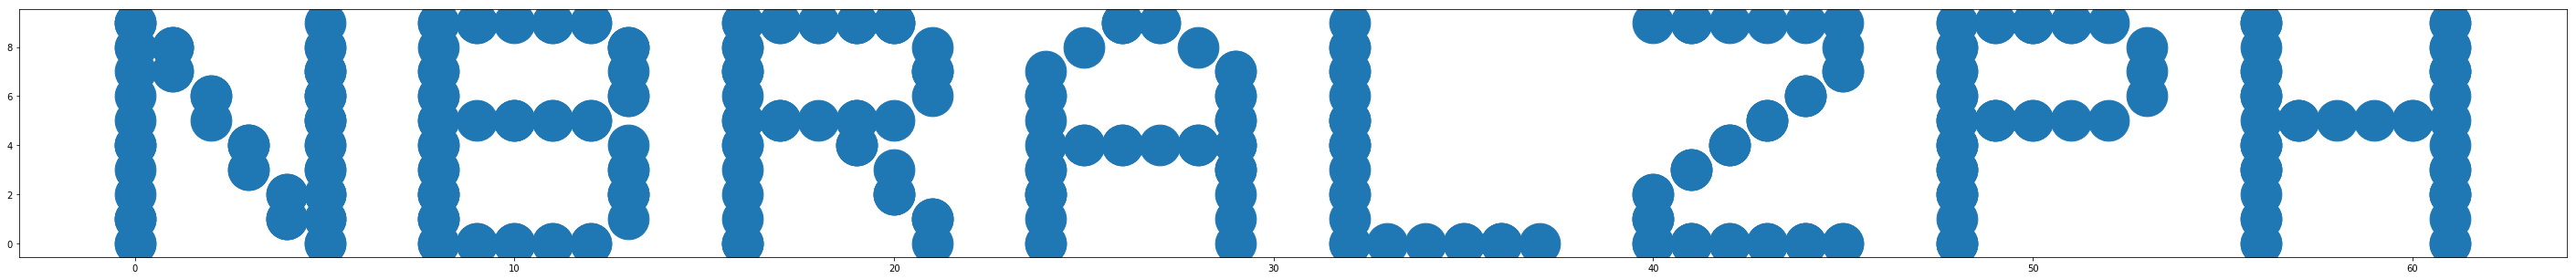

In [12]:
import re
from matplotlib import pyplot as plt
%matplotlib inline

lines = open("../data/day10.txt").read().split("\n")[:-1]

def parse(lines):
    return [{"loc": list(map(int, re.findall("-?[0-9]{1,}", line)))[0:2],
             "vel": list(map(int, re.findall("-?[0-9]{1,}", line)))[2:4]}
            for line in lines]

def update(input,seconds):
    updated_input = []
    for x in input:
        loc = [x["loc"][i] + (x["vel"][i] * seconds) for i in range(2)]
        updated_input.append({"loc": loc, "vel": x["vel"]})
    return updated_input

def shift(input):
    x_min = min([x["loc"][0] for x in input])
    y_min = min([x["loc"][1] for x in input])
    updated_input = []
    for x in input:
        loc = [x["loc"][idx] - i for idx, i in enumerate([x_min, y_min])]
        updated_input.append(loc)
    return updated_input

def ready_to_plot(input):
    return list(zip(*input))[0],list(zip(*input))[1]

def flip_up_down(xs,ys):
    max_y = max(ys)
    new_ys = [max_y - y for y in ys]
    return xs, new_ys
    
seconds = 10454
input = parse(lines)
updated_input = update(input, seconds)
updated_input = shift(updated_input)
xs,ys = ready_to_plot(updated_input)
xs,ys = flip_up_down(xs,ys)

plt.rcParams['figure.figsize'] = [50, 5]
plt.scatter(xs,ys, s = 2000)